In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use category type to save mem for ['profile_type','classification','status', 'PE_Backed', 'VC_Backed','State', 'Country','sic','naics']
data_types = {
    'ID': int,
    'profile_type': str,
    'classification': str,
    'status': str,
    'PE_Backed': str,
    'VC_Backed': str,
    'year_founded': int,
    'City': str,
    'State': str,
    'Country': str,
    'Zip': str,
    'Industry_PICS': str,
    'Keywords': str,
    'sic': str,
    'naics': str,
    'Company_Tags': str,
    'fiscal_month': int,
    'fiscal_day': int,
    'Total_Round': float,
    'index_total_funding': float,
    'Latest_Valuation': float,
    'Latest_Valuation_Year': float,
    '1 Year Revenue Growth': float,
    '3 Year Revenue Growth': float,
    '1 Year Employee Growth': float,
    '3 Year Employee Growth': float,
    '2024 Revenue': float,
    '2023 Revenue': float,
    '2022 Revenue': float,
    '2021 Revenue': float,
    '2020 Revenue': float,
    '2019 Revenue': float,
    '2018 Revenue': float,
    '2017 Revenue': float,
    '2024 Employees': float,  # Could be int, but float to handle potential NaNs
    '2023 Employees': float,
    '2022 Employees': float,
    '2021 Employees': float,
    '2020 Employees': float,
    '2019 Employees': float,
    '2018 Employees': float,
    '2017 Employees': float,
    '2023 EBITDA': float,
    '2022 EBITDA': float,
    '2021 EBITDA': float,
    '2020 EBITDA': float,
    '2019 EBITDA': float,
    '2018 EBITDA': float,
    '2017 EBITDA': float,
    '2023 EV': float,
    '2022 EV': float,
    '2021 EV': float,
    '2020 EV': float,
    '2019 EV': float,
    '2018 EV': float,
    '2017 EV': float,
    '2023 Net Income': float,
    '2022 Net Income': float,
    '2021 Net Income': float,
    '2020 Net Income': float,
    '2019 Net Income': float,
    '2018 Net Income': float,
    '2017 Net Income': float,
}


# You would then use this dictionary when calling read_csv, like so:
df = pd.read_csv('raw_PrivCo_data.csv', dtype=data_types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5997 non-null   int64  
 1   PrivCo_ID               5997 non-null   int64  
 2   profile_type            5997 non-null   object 
 3   classification          5997 non-null   object 
 4   status                  5997 non-null   object 
 5   PE_Backed               5997 non-null   object 
 6   VC_Backed               5997 non-null   object 
 7   year_founded            5997 non-null   int64  
 8   City                    5948 non-null   object 
 9   State                   5933 non-null   object 
 10  Country                 5997 non-null   object 
 11  Zip                     4796 non-null   object 
 12  Industry_PICS           5980 non-null   object 
 13  Keywords                5812 non-null   object 
 14  sic                     201 non-null    

In [3]:
#print(df.columns)
#['Unnamed: 0', '2024 Revenue', '2024 Employees', '2020 Net Income', '2019 Net Income', '2018 Net Income', '2017 Net Income']
df = df.drop(['Unnamed: 0', '2024 Revenue', '2024 Employees'], axis = 1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrivCo_ID               5997 non-null   int64  
 1   profile_type            5997 non-null   object 
 2   classification          5997 non-null   object 
 3   status                  5997 non-null   object 
 4   PE_Backed               5997 non-null   object 
 5   VC_Backed               5997 non-null   object 
 6   year_founded            5997 non-null   int64  
 7   City                    5948 non-null   object 
 8   State                   5933 non-null   object 
 9   Country                 5997 non-null   object 
 10  Zip                     4796 non-null   object 
 11  Industry_PICS           5980 non-null   object 
 12  Keywords                5812 non-null   object 
 13  sic                     201 non-null    object 
 14  naics                   564 non-null    

PrivCo_ID profile_type classification  status PE_Backed VC_Backed  \
0       4656      Company         Public  Active        No        No   
1      42154      Company        Private  Active        No        No   
2      45384      Company        Private  Active        No       Yes   
3      47579      Company        Private  Active        No        No   
4     268903      Company        Private  Active        No       Yes   

   year_founded           City State Country  ...     2019 EV     2018 EV  \
0          2020     Minnetonka    MN      US  ...         NaN         NaN   
1          2017   Cedar Rapids    IA      US  ...  76000000.0  63500000.0   
2          2017        Seattle    WA      US  ...         NaN         NaN   
3          2018        Houston    TX      US  ...         NaN         NaN   
4          2017  Mountain View    CA      US  ...         NaN         NaN   

      2017 EV 2023 Net Income 2022 Net Income 2021 Net Income  \
0         NaN             NaN     -27216000.0             NaN   
1  56000000.0       2550000.0       2800000.0       2900000.0   
2         NaN             NaN             NaN             NaN   
3         NaN        395000.0        395000.0             NaN   
4         NaN             NaN             NaN             NaN   

   2020 Net Income  2019 Net Income  2018 Net Income  2017 Net Income  
0        -172000.0        6469000.0              NaN              NaN  
1              NaN              NaN              NaN              NaN  
2              NaN              NaN              NaN              NaN  
3              NaN              NaN              NaN              NaN  
4              NaN              NaN              NaN              NaN  

[5 rows x 61 columns]

In [4]:
df.columns

Index(['PrivCo_ID', 'profile_type', 'classification', 'status', 'PE_Backed',
       'VC_Backed', 'year_founded', 'City', 'State', 'Country', 'Zip',
       'Industry_PICS', 'Keywords', 'sic', 'naics', 'Company_Tags',
       'fiscal_month', 'fiscal_day', 'Total_Round', 'index_total_funding',
       'Latest_Valuation', 'Latest_Valuation_Year', '1 Year Revenue Growth',
       '3 Year Revenue Growth', '1 Year Employee Growth',
       '3 Year Employee Growth', '2023 Revenue', '2022 Revenue',
       '2021 Revenue', '2020 Revenue', '2019 Revenue', '2018 Revenue',
       '2017 Revenue', '2023 Employees', '2022 Employees', '2021 Employees',
       '2020 Employees', '2019 Employees', '2018 Employees', '2017 Employees',
       '2023 EBITDA', '2022 EBITDA', '2021 EBITDA', '2020 EBITDA',
       '2019 EBITDA', '2018 EBITDA', '2017 EBITDA', '2023 EV', '2022 EV',
       '2021 EV', '2020 EV', '2019 EV', '2018 EV', '2017 EV',
       '2023 Net Income', '2022 Net Income', '2021 Net Income',
       '2020 Ne

In [5]:
df = df.drop_duplicates()


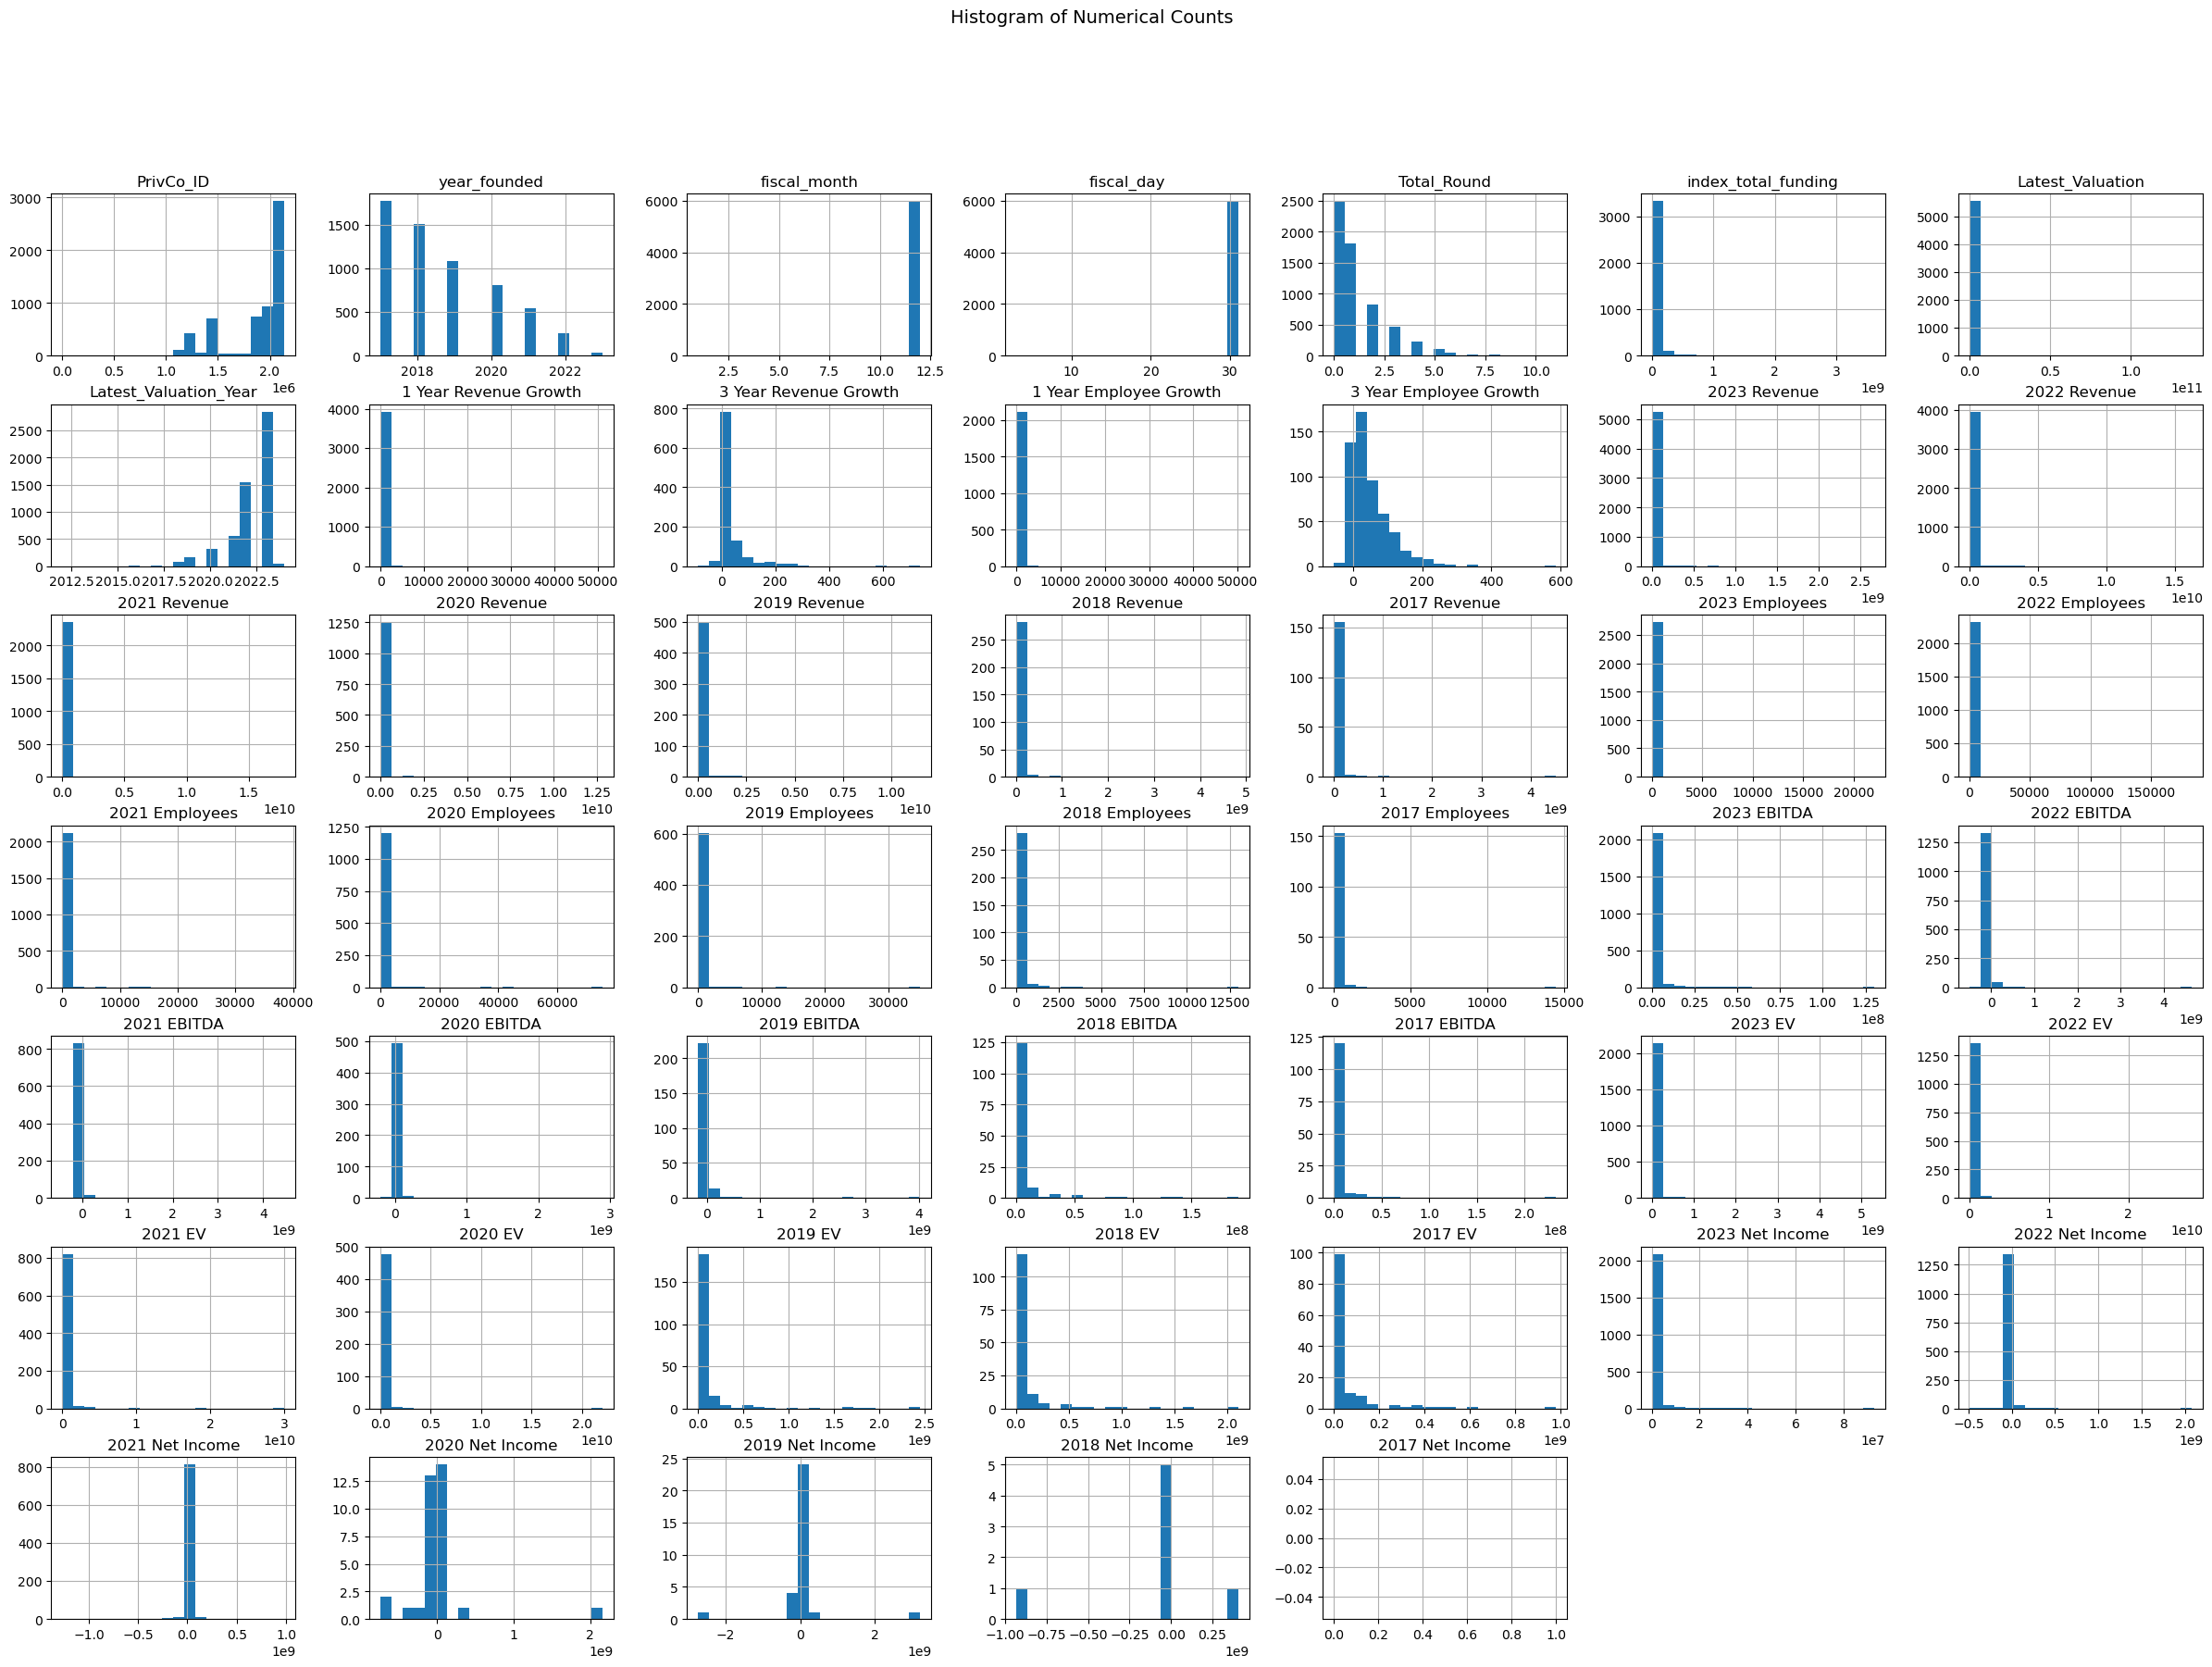

In [6]:
df.hist(bins= 20, figsize=(30, 20))
plt.suptitle('Histogram of Numerical Counts', fontsize=14)

plt.show()

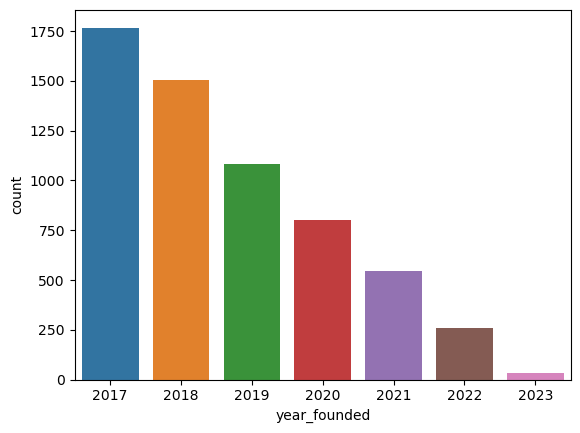

In [7]:
sns.countplot(x='year_founded', data=df)
plt.show()

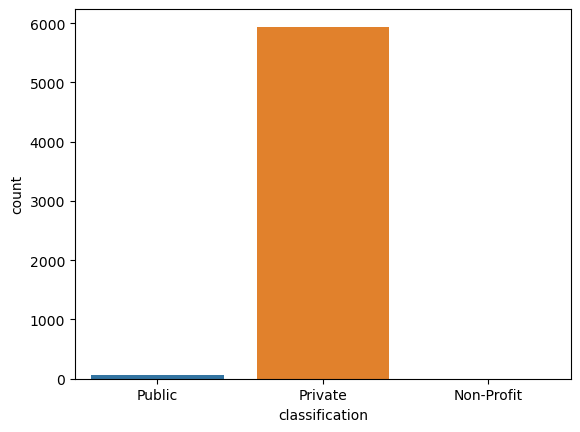

In [8]:
sns.countplot(x='classification', data=df)
plt.show()

In [9]:

min_value = df['Latest_Valuation'].min()

max_value = df['Latest_Valuation'].max()

val_range = max_value - min_value

print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Range of values:", val_range)

Minimum value: 1050000.0
Maximum value: 138000000000.0
Range of values: 137998950000.0



#### (Linear Regression: Predict lastest Valuation)

In [10]:
df.to_pickle('EDA_cleaned_PrivCo_data.pkl')

For EBITDA, EV and Net Income I will combine each to get a latest non-null growth metric (for each metric used)


Question: Why are there so many NaNs in the Revenue Growth Columns
- Companies haven't been around for 1 or 3 years?
- Ans: Growth can be calculated but isn't because of missing values

For revenue growth: 2017 - 2023 Revenue contains companies that started in 2019 and only have 2019-2023 non-null revenue data. Therefor I will caluculate the companies Compound Anual Growth Rate (CAGR)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5997 entries, 0 to 5996
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrivCo_ID               5997 non-null   int64  
 1   profile_type            5997 non-null   object 
 2   classification          5997 non-null   object 
 3   status                  5997 non-null   object 
 4   PE_Backed               5997 non-null   object 
 5   VC_Backed               5997 non-null   object 
 6   year_founded            5997 non-null   int64  
 7   City                    5948 non-null   object 
 8   State                   5933 non-null   object 
 9   Country                 5997 non-null   object 
 10  Zip                     4796 non-null   object 
 11  Industry_PICS           5980 non-null   object 
 12  Keywords                5812 non-null   object 
 13  sic                     201 non-null    object 
 14  naics                   564 non-null    

In [12]:
# Corlation matrix
plt.figure(figsize=(120,100))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 30})
plt.tick_params(axis='both', which='major', labelsize=40)
plt.show()

/var/folders/th/cpzn33tn2cbb3_fs33lld_2w0000gn/T/ipykernel_86576/467661071.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Figure size 640x480 with 0 Axes>